In [1]:
# This code was adapted from Session 13 - [7.2] Heaps and priority queues PCWbook

class MaxHeapq:
    """
    A class that implements properties and methods
		that support a max priority queue data structure

		Attributes
	  ----------
	  heap : arr
	      A Python list where key values in the max heap are stored
	  heap_size: int
	      An integer counter of the number of keys present in the max heap
	  """

    def __init__(self):
        """
        Parameters
        ----------
        None
        """
        self.heap       = []
        self.heap_size  = 0

    def left(self, i):
        """
        Takes the index of the parent node
        and returns the index of the left child node

        Parameters
        ----------
        i: int
          Index of parent node

        Returns
        ----------
        int
          Index of the left child node
        """
        return 2 * i + 1

    def right(self, i):
        """
        Takes the index of the parent node
        and returns the index of the right child node

        Parameters
        ----------
        i: int
            Index of parent node

        Returns
        ----------
        int
            Index of the right child node
        """
        return 2 * i + 2

    def parent(self, i):
        """
        Takes the index of the child node
        and returns the index of the parent node

        Parameters
        ----------
        i: int
            Index of child node

        Returns
        ----------
        int
            Index of the parent node
        """

        return (i - 1)//2


    def heappush(self, task):
        """
        Insert a key into a priority queue

        Parameters
        ----------
        key: int
            The key value to be inserted

        Returns
        ----------
        None
        """
        if not isinstance(task, Task):
          raise TypeError("Only Task objects can be added to the heap")
        self.heap.append(task)
        self.heap_size+=1
        self.increase_key(self.heap_size - 1)

    def increase_key(self, i):
        """
        Modifies the value of a key in a max priority queue
        with a higher value

        Parameters
        ----------
        i: int
            The index of the key to be modified
        key: int
            The new key value

        Returns
        ----------
        None
        """
        while i > 0 and self.heap[self.parent(i)].priority < self.heap[i].priority:
            self.heap[i], self.heap[self.parent(i)] = self.heap[self.parent(i)], self.heap[i]
            i = self.parent(i)

    def heapify(self, i):
        """
        Creates a max heap from the index given

        Parameters
        ----------
        i: int
            The index of of the root node of the subtree to be heapify

        Returns
        ----------
        None
        """
        l = self.left(i)
        r = self.right(i)
        heap = self.heap
        largest = i
        if l <= (self.heap_size-1) and heap[l].priority > heap[i].priority:
            largest = l
        else:
            largest = i
        if r <= (self.heap_size-1) and heap[r].priority > heap[largest].priority:
            largest = r
        if largest != i:
            heap[i], heap[largest] = heap[largest], heap[i]
            self.heapify(largest)

    def heappop(self):
        """
        Returns the largest key in the max priority queue
        and removes it from the max priority queue

        Parameters
        ----------
        None

        Returns
        ----------
        int
            the max value in the heap that is extracted
        """
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        max_task = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size-=1
        self.heapify(0)
        return max_task


    def is_empty(self):
      """
      Returns True if the heap is empty, otherwise False.
      """
      return self.heap_size == 0


In [2]:
# This code was adapted from Session 13 - [7.2] Heaps and priority queues PCWbook

class MinHeapq:
    """
    A class that implements properties and methods
    that support a min priority queue data structure.

    Attributes
    ----------
    heap : list
        A Python list where key values in the min heap are stored.
    heap_size : int
        An integer counter of the number of keys present in the min heap.
    """

    def __init__(self):
        """
        Parameters
        ----------
        None
        """
        self.heap = []
        self.heap_size = 0

    def left(self, i):
        """
        Takes the index of the parent node
        and returns the index of the left child node.

        Parameters
        ----------
        i: int
            Index of the parent node.

        Returns
        ----------
        int
            Index of the left child node.
        """
        return 2 * i + 1

    def right(self, i):
        """
        Takes the index of the parent node
        and returns the index of the right child node.

        Parameters
        ----------
        i: int
            Index of the parent node.

        Returns
        ----------
        int
            Index of the right child node.
        """
        return 2 * i + 2

    def parent(self, i):
        """
        Takes the index of the child node
        and returns the index of the parent node.

        Parameters
        ----------
        i: int
            Index of the child node.

        Returns
        ----------
        int
            Index of the parent node.
        """
        return (i - 1) // 2

    def heappush(self, task):
        """
        Insert a key into a priority queue.

        Parameters
        ----------
        task: Task
            The Task object to be inserted.

        Returns
        ----------
        None
        """
        if not isinstance(task, Task):
            raise TypeError("Only Task objects can be added to the heap")
        self.heap.append(task)
        self.heap_size += 1
        self.decrease_key(self.heap_size - 1)

    def decrease_key(self, i):
        """
        Modifies the value of a key in a min priority queue
        with a lower value to maintain the min-heap property.

        Parameters
        ----------
        i: int
            The index of the key to be modified.

        Returns
        ----------
        None
        """
        while i > 0 and self.heap[self.parent(i)].time_constraint > self.heap[i].time_constraint:
            self.heap[i], self.heap[self.parent(i)] = self.heap[self.parent(i)], self.heap[i]
            i = self.parent(i)

    def heappop(self):
        """
        Returns the smallest key in the min priority queue
        and removes it from the min priority queue.

        Parameters
        ----------
        None

        Returns
        ----------
        Task
            The Task object with the smallest time constraint.
        """
        if self.heap_size < 1:
            raise ValueError("Heap underflow: No tasks in the priority queue")
        min_task = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size -= 1
        self._heapify_down(0)
        return min_task

    def _heapify_down(self, i):
        """
        Creates a min heap from the index given.

        Parameters
        ----------
        i: int
            The index of the root node of the subtree to be heapified.

        Returns
        ----------
        None
        """
        smallest = i
        l = self.left(i)
        r = self.right(i)

        if l < self.heap_size and self.heap[l].time_constraint < self.heap[smallest].time_constraint:
            smallest = l
        if r < self.heap_size and self.heap[r].time_constraint < self.heap[smallest].time_constraint:
            smallest = r
        if smallest != i:
            self.heap[i], self.heap[smallest] = self.heap[smallest], self.heap[i]
            self._heapify_down(smallest)

    def is_empty(self):
        """
        Returns True if the heap is empty, otherwise False.

        Parameters
        ----------
        None

        Returns
        ----------
        bool
            True if the heap is empty, otherwise False.
        """
        return self.heap_size == 0

    def peek(self):
        """
        Returns the Task with the smallest time constraint without removing it.

        Parameters
        ----------
        None

        Returns
        ----------
        Task
            The Task object with the smallest time constraint.
        """
        if self.heap_size < 1:
            raise ValueError("Heap underflow: No tasks in the priority queue")
        return self.heap[0]

In [3]:
# This code was adapted from Session 13 - [7.2] Heaps and priority queues Breakout Workbook

class Task:
    """
    - id: Task id (a reference number)
    - description: Task short description
    - duration: Task duration in minutes
    - dependencies: List of task ids that need to precede this task
    - status: Current status of the task
    - time_constraint: Scheduled start time for fixed-time tasks
    - priority: Computed priority value for flexible tasks
    """
    def __init__(self, id, description, duration, dependencies, status="N", time_constraint=None, priority=None):
        self.id = id
        self.description = description
        self.duration = duration
        self.dependencies = dependencies
        self.status = status
        self.time_constraint = time_constraint
        self.priority = priority

    def __lt__(self, other):
        # for fixed-time tasks (MinHeapq): earlier tasks have higher priority.
        if self.time_constraint is not None:
            return self.time_constraint < other.time_constraint
        # for flexible tasks (MaxHeapq): higher computed priority means higher priority.
        else:
            return self.priority > other.priority


class TaskScheduler:
    """
    A scheduler that manages tasks with stict execution times for fixed tasks
    and priority-based scheduling for flexible tasks.

    Attributes
    ----------
    tasks : list
        List of Task objects to be scheduled
    task_lookup: dict
        Dictionary mapping task IDs to Task objects
    dependents_lookup: dict
        Dictionary mapping task IDs to lists of tasks that depend on them
    priority_cache: dict
        Cache for storing computed priority values of tasks
    fixed_queue: MinHeapq
        Min-heap priority queue for fixed-time tasks
    flexible_queue: MaxHeapq
        Max-heap priority queue for flexible tasks
    """

    NOT_STARTED = 'N'
    IN_PROGRESS = 'I'
    COMPLETED = 'C'

    def __init__(self, tasks):
        self.tasks = tasks
        self.task_lookup = {task.id: task for task in tasks}
        self.dependents_lookup = self.build_dependents_lookup()
        self.priority_cache = {}
        self.fixed_queue = MinHeapq()
        self.flexible_queue = MaxHeapq()
        self.initialize_queues()

    def build_dependents_lookup(self):
        """
        Builds a mapping from task ID to the list of tasks that depend on it.

        Returns
        -------
        dist
            Dictionary where keys are task IDs and values are lists of dependent
            tasks.
        """
        dependents = {task.id: [] for task in self.tasks}
        for task in self.tasks:
            for dep in task.dependencies:
                if dep in dependents:
                    dependents[dep].append(task)
        return dependents

    def initialize_queues(self):
        """
        Sorts tasks into fixed or flexible queues based on their time constraints.
        Computes priorities for flexible tasks and pushes them into the appropriate
        queues.
        """
        for task in self.tasks:
            if task.time_constraint:
                self.fixed_queue.heappush(task)
            else:
                task.priority = self.calculate_priority(task)
                self.flexible_queue.heappush(task)

    def calculate_priority(self, task):
        """
        Recursively computes the priority value for a flexible task.
        The priority value is calculated as:
            priority_value(task) = base_priority(task) + sum(priority_value(dependent)
            for dependent in dependents)
        where:
            base_priority(task) = (P_weight * P + L_weight * L)
        P: fixed-time dependency boost – 1/(earliest fixed time among dependents + 1)
        L: depth of the dependency chain (i.e. how many layers of dependents)

        Parameters
        ----------
        task
            The task for which to calculate the priority


        Returns
        -------
            int
                The computed priority value for the given task
        """
        if task.id in self.priority_cache:
            return self.priority_cache[task.id]

        P_weight, L_weight = 100, 10  # weights can be adjusted if needed

        # find the earliest fixed-time among all dependents (direct or indirect)
        def find_earliest_fixed(t):
            times = []
            for dep in self.dependents_lookup.get(t.id, []):
                if dep.time_constraint:
                    times.append(dep.time_constraint)
                else:
                    t_dep = find_earliest_fixed(dep)
                    if t_dep != float("inf"):
                        times.append(t_dep)
            return min(times) if times else float("inf")
        earliest_fixed = find_earliest_fixed(task)
        P = 1 / (earliest_fixed + 1) if earliest_fixed != float("inf") else 0

        # compute the depth of dependents: if no dependents, depth is 0; else 1 + max(depth(dependent))
        def get_dependent_depth(t):
            deps = self.dependents_lookup.get(t.id, [])
            if not deps:
                return 0
            return 1 + max(get_dependent_depth(dep) for dep in deps)
        L = get_dependent_depth(task)

        base_priority = (P_weight * P + L_weight * L)

        # final prioririty value includes the priorities of all dependents
        priority_value = base_priority
        for dep in self.dependents_lookup.get(task.id, []):
            priority_value += self.calculate_priority(dep)
        self.priority_cache[task.id] = priority_value
        return priority_value

    def get_next_fixed_time(self):
        """
        Returns the time of the next fixed-time task.

        Returns
        -------
        int
            The time of the next fixed-time task, or None if there are no fixed-time tasks.
        """
        return self.fixed_queue.peek().time_constraint if not self.fixed_queue.is_empty() else None

    def remove_dependency(self, id):
        """
        Removes a completed task from other tasks' dependencies.

        Parameters
        ----------
        id: int
            The ID of the completed task.
        """
        for task in self.tasks:
            if id in task.dependencies:
                task.dependencies.remove(id)

    def run_task_scheduler(self, starting_time):
        """
        Executes tasks while ensuring fixed tasks are run at their exact scheduled
        times.

        Parameters
        ----------
        starting_time: int
            The starting time for the scheduler in minutes.

        """
        current_time = starting_time
        print("Running the scheduler:\n")

        while not self.fixed_queue.is_empty() or not self.flexible_queue.is_empty():
            next_fixed_time = self.get_next_fixed_time()

            if not self.fixed_queue.is_empty() and self.fixed_queue.peek().time_constraint == current_time:
                task = self.fixed_queue.heappop()
            elif not self.flexible_queue.is_empty() and (next_fixed_time is None or current_time + self.flexible_queue.heap[0].duration <= next_fixed_time):
                task = self.flexible_queue.heappop()
            else:
                wait_duration = next_fixed_time - current_time
                print(f"⏳ Waiting {wait_duration} minutes until {self.format_time(next_fixed_time)}")
                current_time = next_fixed_time
                continue

            print(f"🕰 t={self.format_time(current_time)}")
            print(f"\tStarted '{task.description}' for {task.duration} mins...")
            current_time += task.duration
            print(f"\t✅ t={self.format_time(current_time)}, task completed!")

            task.status = self.COMPLETED
            self.remove_dependency(task.id)

        print(f"\n🏁 Completed all planned tasks in {self.format_time(current_time - starting_time)}!\n")

    def format_time(self, time):
        """
        Formats a time in minutes into a human-readable string (e.g. "1h30")

        Parameters
        ----------
        time: int
            Time in minutes.

        Returns
        -------
        str
            Formatted time string.

        """
        return f"{time // 60}h{time % 60:02d}"


In [4]:
# test cases for MaxHeapq

def test_max_heapq_basic():
    """
    Test basic functionality of MaxHeapq:
    - Insert elements and ensure the max element is always at the root.
    - Remove elements and ensure the heap maintains the max-heap property.
    """
    max_heap = MaxHeapq()
    tasks = [
        Task(id=1, description="Task A", duration=30, dependencies=[], priority=5),
        Task(id=2, description="Task B", duration=20, dependencies=[], priority=10),
        Task(id=3, description="Task C", duration=10, dependencies=[], priority=3),
    ]
    for task in tasks:
        max_heap.heappush(task)

    # check the max element
    assert max_heap.heappop().priority == 10  # Task B
    assert max_heap.heappop().priority == 5   # Task A
    assert max_heap.heappop().priority == 3   # Task C
    assert max_heap.is_empty()  # heap should be empty

def test_max_heapq_heap_property():
    """
    Test that the max-heap maintains its structure:
    - Insert elements in random order.
    - Ensure the max element is always at the root after each insertion.
    """
    max_heap = MaxHeapq()
    tasks = [
        Task(id=1, description="Task A", duration=30, dependencies=[], priority=7),
        Task(id=2, description="Task B", duration=20, dependencies=[], priority=3),
        Task(id=3, description="Task C", duration=10, dependencies=[], priority=10),
        Task(id=4, description="Task D", duration=15, dependencies=[], priority=5),
    ]
    for task in tasks:
        max_heap.heappush(task)
        assert max_heap.heap[0].priority == max(task.priority for task in max_heap.heap)  # max element at root

    # remove elements and check heap property
    assert max_heap.heappop().priority == 10  # Task C
    assert max_heap.heappop().priority == 7   # Task A
    assert max_heap.heappop().priority == 5   # Task D
    assert max_heap.heappop().priority == 3   # Task B
    assert max_heap.is_empty()  # heap should be empty

def test_max_heapq_single_element():
    """
    Test the max-heap with a single element:
    - Insert one element and ensure it is returned when popped.
    - Ensure the heap is empty after popping.
    """
    max_heap = MaxHeapq()
    task = Task(id=1, description="Task A", duration=30, dependencies=[], priority=5)
    max_heap.heappush(task)

    assert max_heap.heappop().priority == 5  # Task A
    assert max_heap.is_empty()  # heap should be empty


test_max_heapq_basic()
test_max_heapq_heap_property()
test_max_heapq_single_element()

In [5]:
# test cases for MinHeapq

def test_min_heapq_basic():
    """
    Test basic functionality of MinHeapq:
    - Insert elements and ensure the min element is always at the root.
    - Remove elements and ensure the heap maintains the min-heap property.
    """
    min_heap = MinHeapq()
    tasks = [
        Task(id=1, description="Task A", duration=30, dependencies=[], time_constraint=60),
        Task(id=2, description="Task B", duration=20, dependencies=[], time_constraint=30),
        Task(id=3, description="Task C", duration=10, dependencies=[], time_constraint=90),
    ]
    for task in tasks:
        min_heap.heappush(task)

    # check the min element
    assert min_heap.heappop().time_constraint == 30  # Task B
    assert min_heap.heappop().time_constraint == 60  # Task A
    assert min_heap.heappop().time_constraint == 90  # Task C
    assert min_heap.is_empty()  # heap should be empty

def test_min_heapq_heap_property():
    """
    Test that the min-heap maintains its structure:
    - Insert elements in random order.
    - Ensure the min element is always at the root after each insertion.
    """
    min_heap = MinHeapq()
    tasks = [
        Task(id=1, description="Task A", duration=30, dependencies=[], time_constraint=60),
        Task(id=2, description="Task B", duration=20, dependencies=[], time_constraint=30),
        Task(id=3, description="Task C", duration=10, dependencies=[], time_constraint=90),
        Task(id=4, description="Task D", duration=15, dependencies=[], time_constraint=45),
    ]
    for task in tasks:
        min_heap.heappush(task)
        assert min_heap.heap[0].time_constraint == min(task.time_constraint for task in min_heap.heap)  # Min element at root

    # remove elements and check heap property
    assert min_heap.heappop().time_constraint == 30  # Task B
    assert min_heap.heappop().time_constraint == 45  # Task D
    assert min_heap.heappop().time_constraint == 60  # Task A
    assert min_heap.heappop().time_constraint == 90  # Task C
    assert min_heap.is_empty()  # heap should be empty


def test_min_heapq_single_element():
    """
    Test the min-heap with a single element:
    - Insert one element and ensure it is returned when popped.
    - Ensure the heap is empty after popping.
    """
    min_heap = MinHeapq()
    task = Task(id=1, description="Task A", duration=30, dependencies=[], time_constraint=60)
    min_heap.heappush(task)

    assert min_heap.heappop().time_constraint == 60  # Task A
    assert min_heap.is_empty()  # heap should be empty

test_min_heapq_basic()
test_min_heapq_heap_property()
test_min_heapq_single_element()

In [6]:
# test cases for Scheduler

def test_case_1():
    """
    Simple dependency chain with one fixed-time task.
    """
    tasks = [
        Task(id=1, description="Wake up", duration=15, dependencies=[]),
        Task(id=2, description="Morning routine", duration=20, dependencies=[1]),
        Task(id=3, description="Breakfast", duration=30, dependencies=[2]),
        Task(id=4, description="PCW for 11 AM class", duration=90, dependencies=[3]),
        Task(id=5, description="Class at 11 AM", duration=90, dependencies=[4], time_constraint=11*60), # 11:00 class
        Task(id=6, description="Cooking", duration=60, dependencies=[]),
        Task(id=7, description="Lunch", duration=45, dependencies=[6])
    ]
    scheduler = TaskScheduler(tasks)
    scheduler.run_task_scheduler(starting_time=8*60)  # 8:00 AM


def test_case_2():
    """
    All tasks are flexible and have interdependent relationships.
    Expected: The root task "Research" should have the highest priority value.
    """
    tasks = [
        Task(id=1, description="Research", duration=120, dependencies=[]),
        Task(id=2, description="Design", duration=90, dependencies=[1]),
        Task(id=3, description="Prototype", duration=180, dependencies=[1, 2]),
        Task(id=4, description="Testing", duration=60, dependencies=[2,3]),
        Task(id=5, description="Documentation", duration=90, dependencies=[3])
    ]
    scheduler = TaskScheduler(tasks)
    scheduler.run_task_scheduler(starting_time=12*60)  # 12:00 PM

def test_case_3():
    """
    Test with multiple fixed-time tasks back-to-back and flexible tasks fitting
    in between.
    """
    tasks = [
        Task(id=1, description="Wake Up", duration=15, dependencies=[]),
        Task(id=2, description="Breakfast", duration=30, dependencies=[1]),
        Task(id=3, description="Work-study meeting", duration=60, dependencies=[2], time_constraint=9*60),
        Task(id=4, description="11 AM class PCW", duration=60, dependencies=[]),
        Task(id=5, description="Class at 11 AM", duration=60, dependencies=[4], time_constraint=660),
        Task(id=6, description="Reading a book", duration=30, dependencies=[]),
    ]
    scheduler = TaskScheduler(tasks)
    scheduler.run_task_scheduler(starting_time=8*60)  # 8:00 AM



def test_case_4():
    """
    Every task is a fixed-time task.
    Expected: The scheduler should simply execute them at their exact specified times.
    """
    tasks = [
        Task(id=1, description="Morning meeting", duration=30, dependencies=[], time_constraint=480),
        Task(id=2, description="Project update", duration=45, dependencies=[], time_constraint=540),
        Task(id=3, description="Brunch break", duration=60, dependencies=[], time_constraint=600),
        Task(id=4, description="Client call", duration=30, dependencies=[], time_constraint=660),
        Task(id=5, description="Wrap-up", duration=15, dependencies=[], time_constraint=690)
    ]
    scheduler = TaskScheduler(tasks)
    scheduler.run_task_scheduler(starting_time=8*60)  # 8:00 AM


def test_case_5():
    """
    Edge case: an empty task list
    """
    tasks = []
    scheduler = TaskScheduler(tasks)
    scheduler.run_task_scheduler(starting_time=1)



# UNCOMMENT TO RUN EACH TEST CASE
# test_case_1()
# test_case_2()
# test_case_3()
# test_case_4()
# test_case_5()


In [7]:
# test that the scheduler prioritizes tasks correctly and that the order of
# input tasks does not affect the output.
def test_order_1():

    tasks_order_1 = [
        Task(id=1, description="Wake Up", duration=15, dependencies=[]),
        Task(id=2, description="Breakfast", duration=30, dependencies=[1]),
        Task(id=3, description="Work-study meeting", duration=60, dependencies=[2], time_constraint=9*60),  # 9:00 AM
        Task(id=4, description="11 AM class PCW", duration=60, dependencies=[]),
        Task(id=5, description="Class at 11 AM", duration=60, dependencies=[4], time_constraint=660),  # 11:00 AM
        Task(id=6, description="Reading a book", duration=30, dependencies=[]),
    ]
    scheduler = TaskScheduler(tasks_order_1)
    scheduler.run_task_scheduler(starting_time=8*60)  # 8:00 AM

def test_order_2():

    tasks_order_2 = [
        Task(id=3, description="Work-study meeting", duration=60, dependencies=[2], time_constraint=9*60),  # 9:00 AM
        Task(id=5, description="Class at 11 AM", duration=60, dependencies=[4], time_constraint=660),  # 11:00 AM
        Task(id=4, description="11 AM class PCW", duration=60, dependencies=[]),
        Task(id=2, description="Breakfast", duration=30, dependencies=[1]),
        Task(id=1, description="Wake Up", duration=15, dependencies=[]),
        Task(id=6, description="Reading a book", duration=30, dependencies=[]),
    ]
    scheduler = TaskScheduler(tasks_order_2)
    scheduler.run_task_scheduler(starting_time=8*60)  # 8:00 AM

assert test_order_1() == test_order_2(), "The output is not the same for the same test cases with different order."
print("Test passed: Scheduler prioritizes tasks correctly and is order-independent.")

Running the scheduler:

🕰 t=8h00
	Started 'Wake Up' for 15 mins...
	✅ t=8h15, task completed!
🕰 t=8h15
	Started 'Breakfast' for 30 mins...
	✅ t=8h45, task completed!
⏳ Waiting 15 minutes until 9h00
🕰 t=9h00
	Started 'Work-study meeting' for 60 mins...
	✅ t=10h00, task completed!
🕰 t=10h00
	Started '11 AM class PCW' for 60 mins...
	✅ t=11h00, task completed!
🕰 t=11h00
	Started 'Class at 11 AM' for 60 mins...
	✅ t=12h00, task completed!
🕰 t=12h00
	Started 'Reading a book' for 30 mins...
	✅ t=12h30, task completed!

🏁 Completed all planned tasks in 4h30!

Running the scheduler:

🕰 t=8h00
	Started 'Wake Up' for 15 mins...
	✅ t=8h15, task completed!
🕰 t=8h15
	Started 'Breakfast' for 30 mins...
	✅ t=8h45, task completed!
⏳ Waiting 15 minutes until 9h00
🕰 t=9h00
	Started 'Work-study meeting' for 60 mins...
	✅ t=10h00, task completed!
🕰 t=10h00
	Started '11 AM class PCW' for 60 mins...
	✅ t=11h00, task completed!
🕰 t=11h00
	Started 'Class at 11 AM' for 60 mins...
	✅ t=12h00, task completed!
🕰 

In [8]:
def my_schedule():

    tasks = [
        Task(id=1, description="SS110 Session", duration=90, dependencies=[], time_constraint=10*60),
        Task(id=2, description="Brunch", duration=30, dependencies=[]),
        Task(id=3, description="SS110 Group Assignment Meeting", duration=210, dependencies=[2], time_constraint=12*60),
        Task(id=4, description="Take a bus/train to Nodeul Island", duration=60, dependencies=[], time_constraint=16*60),
        Task(id=5, description="Plan trip to Jeju", duration=120, dependencies=[4]),
        Task(id=6, description="Dinner at Korean BBQ restaurant", duration=90, dependencies=[5], time_constraint=19*60),
        Task(id=7, description="Work Study", duration=60, dependencies=[]),
        Task(id=8, description="Apply to internships", duration=60, dependencies=[]),
    ]
    scheduler = TaskScheduler(tasks)
    scheduler.run_task_scheduler(starting_time=10*60)  # 10 AM

my_schedule()

Running the scheduler:

🕰 t=10h00
	Started 'SS110 Session' for 90 mins...
	✅ t=11h30, task completed!
🕰 t=11h30
	Started 'Brunch' for 30 mins...
	✅ t=12h00, task completed!
🕰 t=12h00
	Started 'SS110 Group Assignment Meeting' for 210 mins...
	✅ t=15h30, task completed!
⏳ Waiting 30 minutes until 16h00
🕰 t=16h00
	Started 'Take a bus/train to Nodeul Island' for 60 mins...
	✅ t=17h00, task completed!
🕰 t=17h00
	Started 'Plan trip to Jeju' for 120 mins...
	✅ t=19h00, task completed!
🕰 t=19h00
	Started 'Dinner at Korean BBQ restaurant' for 90 mins...
	✅ t=20h30, task completed!
🕰 t=20h30
	Started 'Work Study' for 60 mins...
	✅ t=21h30, task completed!
🕰 t=21h30
	Started 'Apply to internships' for 60 mins...
	✅ t=22h30, task completed!

🏁 Completed all planned tasks in 12h30!



Streaming output truncated to the last 5000 lines.
🕰 t=12h45
	Started 'Task 1401' for 210 mins...
	✅ t=16h15, task completed!
⏳ Waiting -210 minutes until 12h45
🕰 t=12h45
	Started 'Task 1835' for 5 mins...
	✅ t=12h50, task completed!
⏳ Waiting -3 minutes until 12h47
🕰 t=12h47
	Started 'Task 1281' for 152 mins...
	✅ t=15h19, task completed!
⏳ Waiting -151 minutes until 12h48
🕰 t=12h48
	Started 'Task 1318' for 233 mins...
	✅ t=16h41, task completed!
⏳ Waiting -233 minutes until 12h48
🕰 t=12h48
	Started 'Task 1448' for 159 mins...
	✅ t=15h27, task completed!
⏳ Waiting -159 minutes until 12h48
🕰 t=12h48
	Started 'Task 1907' for 104 mins...
	✅ t=14h32, task completed!
⏳ Waiting -102 minutes until 12h50
🕰 t=12h50
	Started 'Task 1317' for 119 mins...
	✅ t=14h49, task completed!
⏳ Waiting -118 minutes until 12h51
🕰 t=12h51
	Started 'Task 1052' for 183 mins...
	✅ t=15h54, task completed!
⏳ Waiting -183 minutes until 12h51
🕰 t=12h51
	Started 'Task 1142' for 162 mins...
	✅ t=15h33, task completed

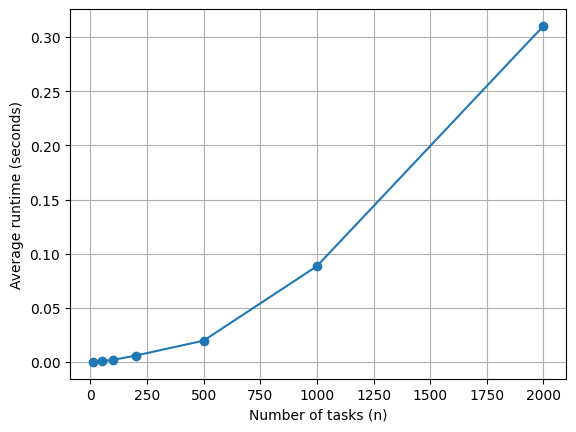

In [9]:
import time
import random
import matplotlib.pyplot as plt

def generate_random_tasks(n):
    """
    Generates a list of random tasks with dependencies, durations, and fixed-time constraints.

    Parameters
    ----------
    n: int
        Number of tasks to generate.

    Returns
    -------
    list
        List of Task objects.
    """
    tasks = []
    for i in range(n):
        duration = random.randint(5, 240)  # random duration between 10 and 240 minutes
        dependencies = random.sample(range(i), min(i, random.randint(0, 5))) if i > 0 else []  # random dependencies
        time_constraint = random.choice([None, random.randint(480, 1020)]) # some tasks have fixed time
        tasks.append(Task(id=i, description=f"Task {i}", duration=duration, dependencies=dependencies, time_constraint=time_constraint))
    return tasks

def measure_runtime(n):
    """
    Measures the runtime of the scheduler for a given number of tasks.

    Parameters
    ----------
    n: int
        Number of tasks.

    Returns
    -------
    float
        Runtime in seconds.
    """
    tasks = generate_random_tasks(n)
    scheduler = TaskScheduler(tasks)
    start_time = time.time()
    scheduler.run_task_scheduler(starting_time=480)  # Start at 8:00 AM
    end_time = time.time()
    return end_time - start_time

# experiment parameters
input_sizes = [10, 50, 100, 200, 500, 1000, 2000]  # input sizes to test
num_trials = 10  # number of trials for each input size
runtimes = []  # list to store average runtimes

# run experiments
for n in input_sizes:
    trial_runtimes = []
    for _ in range(num_trials):
        runtime = measure_runtime(n)
        trial_runtimes.append(runtime)
    average_runtime = sum(trial_runtimes) / num_trials
    runtimes.append(average_runtime)
    print(f"Input size: {n}, Average Runtime: {average_runtime:.4f} seconds")

# plot results
plt.plot(input_sizes, runtimes, marker='o')
plt.xlabel("Number of tasks (n)")
plt.ylabel("Average runtime (seconds)")
plt.grid(True)
plt.show()

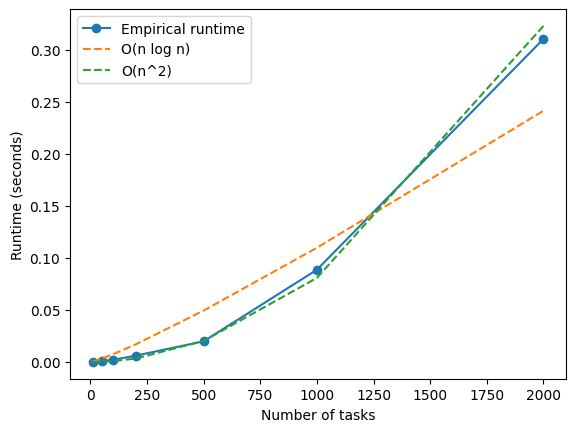

In [10]:
import numpy as np
#  theoretical curves for comparison
n_vals = np.array(input_sizes)
n_log_n = n_vals * np.log(n_vals)
n_sq = n_vals ** 2

scale_factor_nlogn = np.mean(runtimes) / np.mean(n_log_n)
scale_factor_nsqr = np.mean(runtimes) / np.mean(n_sq)

plt.figure()
plt.plot(input_sizes, runtimes, 'o-', label="Empirical runtime")
plt.plot(n_vals, scale_factor_nlogn * n_log_n, '--', label="O(n log n)")
plt.plot(n_vals, scale_factor_nsqr * n_sq, '--', label="O(n^2)")
plt.xlabel("Number of tasks")
plt.ylabel("Runtime (seconds)")
plt.legend()
plt.show()
